# Training LSTM Network

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import urllib.request, json 
import os
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tickerSymbol = 'JPM'
tickerData = yf.Ticker(tickerSymbol)
tickerDf2 = tickerData.history(period = '1d', start = '1990-1-1', end = '2018-12-31')

In [3]:
df = pd.DataFrame(tickerDf2)

In [4]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

In [5]:
print(df)

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
1990-01-02   3.628045   3.658406   3.628045   3.643226   1180500        0.0   
1990-01-03   3.688764   3.764665   3.643224   3.764665   1597200        0.0   
1990-01-04   3.764667   3.795027   3.749487   3.779847   1010100        0.0   
1990-01-05   3.795025   3.795025   3.734304   3.795025    936900        0.0   
1990-01-08   3.779844   3.810204   3.749484   3.795025    569400        0.0   
...               ...        ...        ...        ...       ...        ...   
2018-12-21  89.820683  91.446523  87.042821  87.488762  41313900        0.0   
2018-12-24  86.299572  87.535212  85.602783  85.602783  17009300        0.0   
2018-12-26  86.113769  89.151764  84.645866  89.151764  22542900        0.0   
2018-12-27  88.092649  90.257340  86.912757  90.155144  20304700        0.0   
2018-12-28  91.000578  91.344329  89.597715  89.9600

In [6]:
df2 = df.to_csv(r'/Users/michaelrozenvasser/Capstone\JP_Morgan_Data_Extended.csv')

In [7]:
df =df2 = pd.read_csv('/Users/michaelrozenvasser/Capstone\JP_Morgan_Data_Extended.csv', header=0, parse_dates=[0], date_parser=parser)

In [8]:
df2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1990-01-02,3.628045,3.658406,3.628045,3.643226,1180500,0.0,0.0
1,1990-01-03,3.688764,3.764665,3.643224,3.764665,1597200,0.0,0.0
2,1990-01-04,3.764667,3.795027,3.749487,3.779847,1010100,0.0,0.0
3,1990-01-05,3.795025,3.795025,3.734304,3.795025,936900,0.0,0.0
4,1990-01-08,3.779844,3.810204,3.749484,3.795025,569400,0.0,0.0


In [9]:
df2 = df2.sort_values('Date')
df2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1990-01-02,3.628045,3.658406,3.628045,3.643226,1180500,0.0,0.0
1,1990-01-03,3.688764,3.764665,3.643224,3.764665,1597200,0.0,0.0
2,1990-01-04,3.764667,3.795027,3.749487,3.779847,1010100,0.0,0.0
3,1990-01-05,3.795025,3.795025,3.734304,3.795025,936900,0.0,0.0
4,1990-01-08,3.779844,3.810204,3.749484,3.795025,569400,0.0,0.0


#### In this Notebook I have chosen a new dataset. I am going to the very beginningg, to 1990, when JPM was first a ticker on the exchange. I did this because this dataset is larger and easier to observe and I don't have to worry about overfitting.

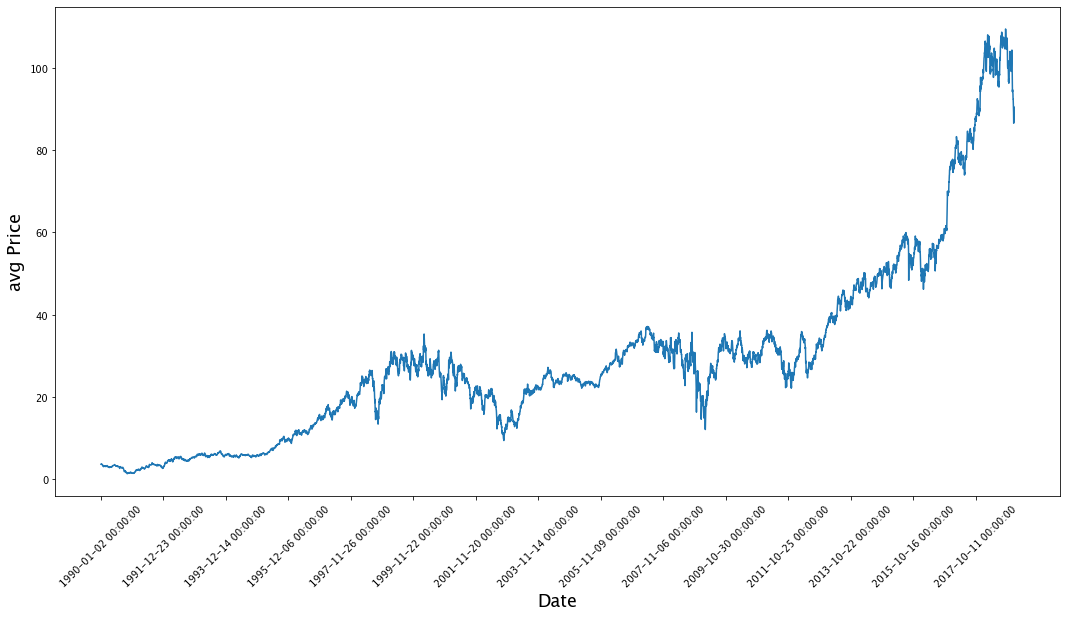

In [10]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('avg Price',fontsize=18)
plt.show()

#### As we can see JPM has been on a steady increase since its inception. The dataset is around 7000 data points and I will be using 6000 of them for training.

In [11]:
# First calculate the average prices from the highest and lowest 
high_prices = df2.loc[:,'High'].sort_values()
low_prices = df2.loc[:,'Low'].sort_values()
avg_prices = (high_prices+low_prices)/2.0

In [12]:
avg_prices

0        3.643226
1        3.703944
2        3.772257
3        3.764664
4        3.779844
          ...    
7301    89.244672
7302    86.568997
7303    86.898815
7304    88.585048
7305    90.471022
Length: 7306, dtype: float64

In [13]:
train = avg_prices[:6000]
test = avg_prices[6000:]
len(avg_prices)

7306

In [14]:
train

0        3.643226
1        3.703944
2        3.772257
3        3.764664
4        3.779844
          ...    
5995    43.026548
5996    43.603133
5997    44.122446
5998    44.318738
5999    44.465942
Length: 6000, dtype: float64

In [15]:
test

6000    44.286021
6001    43.378219
6002    42.936584
6003    42.928406
6004    43.177856
          ...    
7301    89.244672
7302    86.568997
7303    86.898815
7304    88.585048
7305    90.471022
Length: 1306, dtype: float64

In [16]:
train = train.to_numpy()
test = test.to_numpy()

#### Start by normazing data and scaling it.

In [17]:
scaler = MinMaxScaler()
train = train.reshape(-1,1)
test = test.reshape(-1,1)

In [18]:
window_size = 1000
for x in range(0,5000,window_size):
    scaler.fit(train[x:x+window_size,:])
    train[x:x+window_size,:] = scaler.transform(train[x:x+window_size,:])

scaler.fit(train[x+window_size:,:])
train[x+window_size:,:] = scaler.transform(train[x+window_size:,:])

#### Here we are creating a window and then smoothening the data points. Using a window of 1000 creates 5 distinct data points.

#### The last normalization smooths over the remaining datapoints.

In [19]:
# Reshape both train and test data
train = train.reshape(-1)

In [20]:
# Normalize test data
test = scaler.transform(test).reshape(-1)

#### Make it into 2D shape to train

### Simple Averaging

In [21]:
EMA = 0.0 # keep EMA 0.0
ema2 = 0.1 
for i in range(6000):
    EMA = ema2*train[i] + (1-ema2)*EMA
    train[i] = EMA

In [22]:
# Used for visualization 
all_avg_data = np.concatenate([train,test],axis=0)

In [25]:
window_size = 100 # chose standard window size of 100
N = train.size
mse_err = []
_avg_pred = [] #create a list for average x, predictions and mse errors
_avg_x = []

#make a for loop where if the value is greater than size then use timedelta function for that 1 day

for idx1 in range(window_size,N):
    
    if idx1 >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df2.loc[idx1,'Date'] 
        
    _avg_pred.append(np.mean(train[idx1-window_size:idx1])) #Keep appending values into into the lists
    mse_err.append((_avg_pred[-1]-train[idx1])**2)   #calculate mse errors
    _avg_x.append(date) #this is the x train for averages we will use to train 

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_err)))

MSE error for standard averaging: 0.00881


#### Here what we are doing is for range from 100 to size of train which is 6000, we are creating training data dates and then finding their mean and appending them to average predictions. The above ethod is good to calculate simple or standard averages.

#### We get a very low MSE error a lot lower than we were expecting.

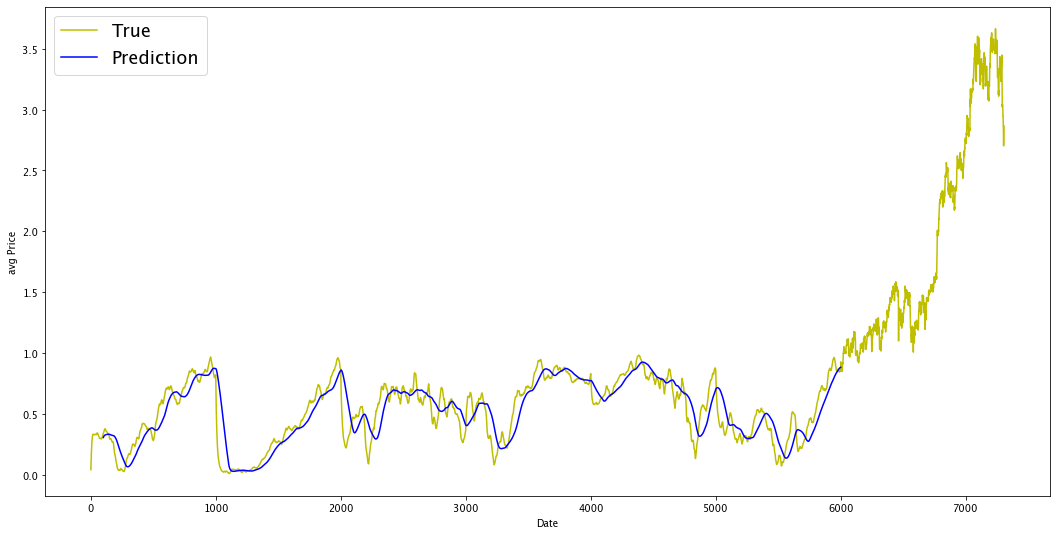

In [24]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_avg_data,color='y',label='True')
plt.plot(range(window_size,N),_avg_pred,color='b',label='Prediction')
plt.xlabel('Date')
plt.ylabel('avg Price')
plt.legend(fontsize=18)
plt.show()

#### Our model worked. Our simple averageing strategy gave us a great first prediction.

https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

#### EMA Averaging

In [27]:
window_size = 50
N = train.size
mse_err = []
_avg_predictions_run = []
_avg_x_run = []



running_mean = 0.0
_avg_predictions_run.append(running_mean) 

decay = 0.5 # use this to average the running mean again

for idx1 in range(1,N): #range from 1 to N-1
     
    running_mean = running_mean*decay + (1.0-decay)*train[idx1-1] #the remaining prob multiplied by the train sets data points
    _avg_predictions_run.append(running_mean)
    mse_err.append((_avg_predictions_run[-1]-train[idx1])**2) #make mse error with the help of train set
    _avg_x_run.append(date) #append the dates into the list

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_err))) #Calculate MSE

MSE error for EMA averaging: 0.00007


#### MSE is really good here much better than simple average

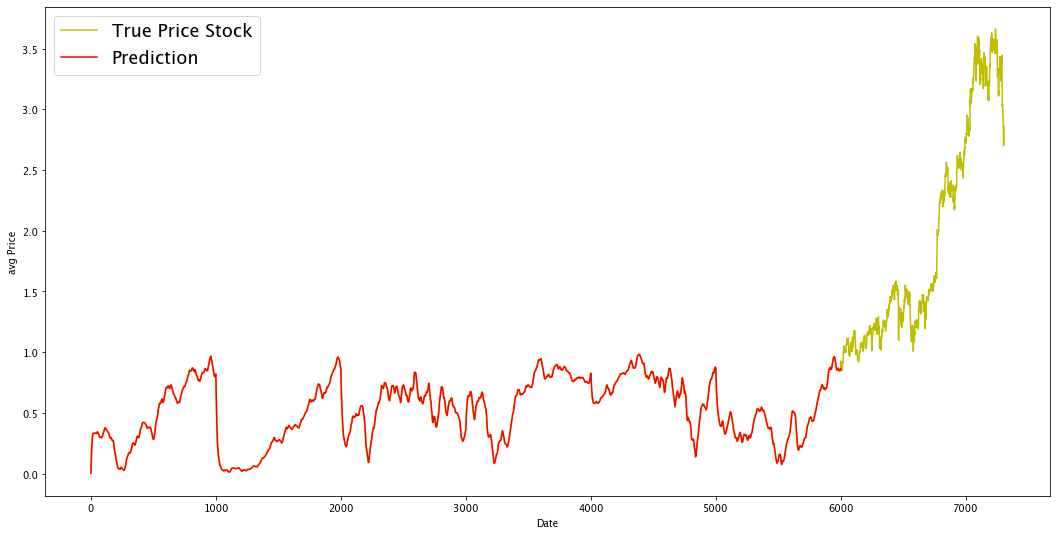

In [28]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_avg_data,color='y',label='True Price Stock')
plt.plot(range(0,N),_avg_predictions_run,color='r', label='Prediction')
plt.xlabel('Date')
plt.ylabel('avg Price')
plt.legend(fontsize=18)
plt.show()

#### EMA is also a great model for this dataset. The pattern of the true data followed in the prediction model

#### We coded from range 1 to N-1 and put all averaged values in the running mean. We used dense as 0.5 and then multiplied it with the running average.

# Generate Stock Price Movements to input into LSTM

#### The below method generates data and puts it in form of batches of the size of the batch size:
1.) generate data and labels

2.) generate simple full length data and labels and make an array for indices using closing prices

3.) use this generated rolled out batches as input for LSTM

4.)the input will be the data and output will be the labels based on the prices



https://machinelearningmastery.com/use-different-batch-sizes-training-predicting-python-keras/

In [29]:
class Generator(object):   
    
    def __init__(self,prices,batch_size,num_unroll): #helps to generate data 
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next(self):   #which will output a set of num_unrollings batches of input data obtained sequentially, where a batch of data is of size [batch_size, 1]. 
        
        batch_data = np.zeros((self._batch_size),dtype=np.float32)  #Then each batch of input data will have a corresponding output batch of data.
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)
        
        for b in range(self._batch_size):   #create batches 
            if self._cursor[b]+1>=self._prices_length:
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)
                
            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(1,5)]
            
            self._cursor[b] = (self._cursor[b]+1)%self._prices_length
            
        return batch_data,batch_labels
    
    def unroll(self):   #roll out the batches generated in form of data and labels 
            
        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):
            
            data, labels = self.next()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels
    
    def reset_indices(self): #get prices length 
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))
        


dg = Generator(train,5,5)
u_data, u_labels = dg.unroll()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.04186632 0.02756304 0.6656768  0.9454338  0.4012034 ]

	Output: [0.17864536 0.02250062 0.70110136 0.9456706  0.3585932 ]


Unrolled index 1
	Inputs:  [0.08065342 0.02624797 0.6740282  0.9456706  0.38851684]

	Output: [0.17864536 0.02064421 0.683611   0.93767846 0.34250894]


Unrolled index 2
	Inputs:  [0.11680773 0.02518599 0.683611   0.9458479  0.3774131 ]

	Output: [0.22577146 0.02250062 0.70110136 0.93767846 0.31822038]


Unrolled index 3
	Inputs:  [0.14920813 0.02393043 0.6928431  0.9458469  0.36768898]

	Output: [0.24519904 0.01918329 0.70110136 0.94399    0.30047423]


Unrolled index 4
	Inputs:  [0.17864536 0.02250062 0.70110136 0.94399    0.3585932 ]

	Output: [0.26171485 0.01834811 0.71942836 0.92980295 0.31822038]


### Tweaking hyperparameters 
Let's tweak hyperparameters so we get better results for the neural net.

D is the dimensionality which is 1. We have a 1d input and will get a simila output

batchsize is how many datapoints are taken in a batch

num_nodes is the number of nodes in each cell and layers is the length of theses number of nodes

In [32]:
D = 1 # Dimensionality of the data. Since our data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

#tf.compat.v1.reset_default_graph() 

#### Split train into input and output and define them. Declare deimensionality of the train. Input is 1 and output is 1. Batchsize is a 1D Tuple.

In [33]:
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    tf.compat.v1.disable_eager_execution()
    train_inputs.append(tf.compat.v1.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.compat.v1.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

#### Declare sing LSTM cell

In [34]:
lstm_cells = [
    tf.compat.v1.nn.rnn_cell.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.compat.v1.keras.initializers.glorot_normal()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.compat.v1.nn.rnn_cell.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.compat.v1.keras.initializers.glorot_normal())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

In [36]:
# Create cell state and hidden state variables to maintain the state of the LSTM
a1, b1 = [],[]
initial_state = []
for li in range(n_layers):
    a1.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
    b1.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
    initial_state.append(tf.compat.v1.nn.rnn_cell.LSTMStateTuple(a1[li], b1[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. 
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

In [47]:
# When calculating the loss we need to be careful about the exact form, because we calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps
loss = 0.0
with tf.control_dependencies([tf.assign(a1[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(b1[li], state[li][1]) for li in range(n_layers)]):
    for ui in range(num_unrollings):
        loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)


global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ =  tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

ValueError: Variable rnn/multi_rnn_cell/cell_0/lstm_cell/kernel/Adam/ already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-37-c560b2c13c12>", line 26, in <module>
    optimizer = optimizer.apply_gradients(
  File "/Users/michaelrozenvasser/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/Users/michaelrozenvasser/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/michaelrozenvasser/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3146, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/Users/michaelrozenvasser/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)


In [46]:
sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
    sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
    sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
    initial_sample_state.append(tf.compat.v1.nn.rnn_cell.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
    sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

In [2]:
epochs = 50
valid_summary = 1 # Interval you make test predictions

n_predict_once = 10 # Number of steps you continously predict for

train_seq_length = train.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = Generator(train,batch_size,num_unrollings) 

x_axis_seq = []

# Points you start our test predictions from
test_points_seq = np.arange(6000,7000,50).tolist() 

for ep in range(epochs):       
    
    #Training
    for step in range(train_seq_length//batch_size):
        
        u_data, u_labels = data_gen.unroll()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)
        
        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l
    
    #Validation
    if (ep+1) % valid_summary == 0:

        average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))
      
      # The average loss
        if (ep+1)%valid_summary==0:
            print('Average loss at step %d: %f' % (ep+1, average_loss))
      
        train_mse_ot.append(average_loss)
            
        average_loss = 0 # reset loss
      
        predictions_seq = []
      
        mse_test_loss_seq = []
      
      #Updating State and Making Predicitons
        for w_i in test_points_seq:
            mse_test_loss = 0.0
            our_predictions = []
        
        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]
        
        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
            current_price = all_avg_data[tr_i]
            feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
            _ = session.run(sample_prediction,feed_dict=feed_dict)
            
        feed_dict = {}
        
        current_price = all_avg_data[w_i-1]
        
        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)
        
        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

            pred = session.run(sample_prediction,feed_dict=feed_dict)
        
          our_predictions.append(np.asscalar(pred))
        
          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

            if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
                x_axis.append(w_i+pred_i)

            mse_test_loss += 0.5*(pred-all_avg_data[w_i+pred_i])**2
        
        session.run(reset_sample_states)
        
        predictions_seq.append(np.array(our_predictions))
        
        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)
        
        if (ep+1)-valid_summary==0:
            x_axis_seq.append(x_axis)
        
        current_test_mse = np.mean(mse_test_loss_seq)
      
      # Learning rate decay logic
        if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
            loss_nondecrease_count += 1
        else:
            loss_nondecrease_count = 0
      
      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')
      
        test_mse_ot.append(current_test_mse)
        print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
        predictions_over_time.append(predictions_seq)
            print('\tFinished Predictions')

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 94)

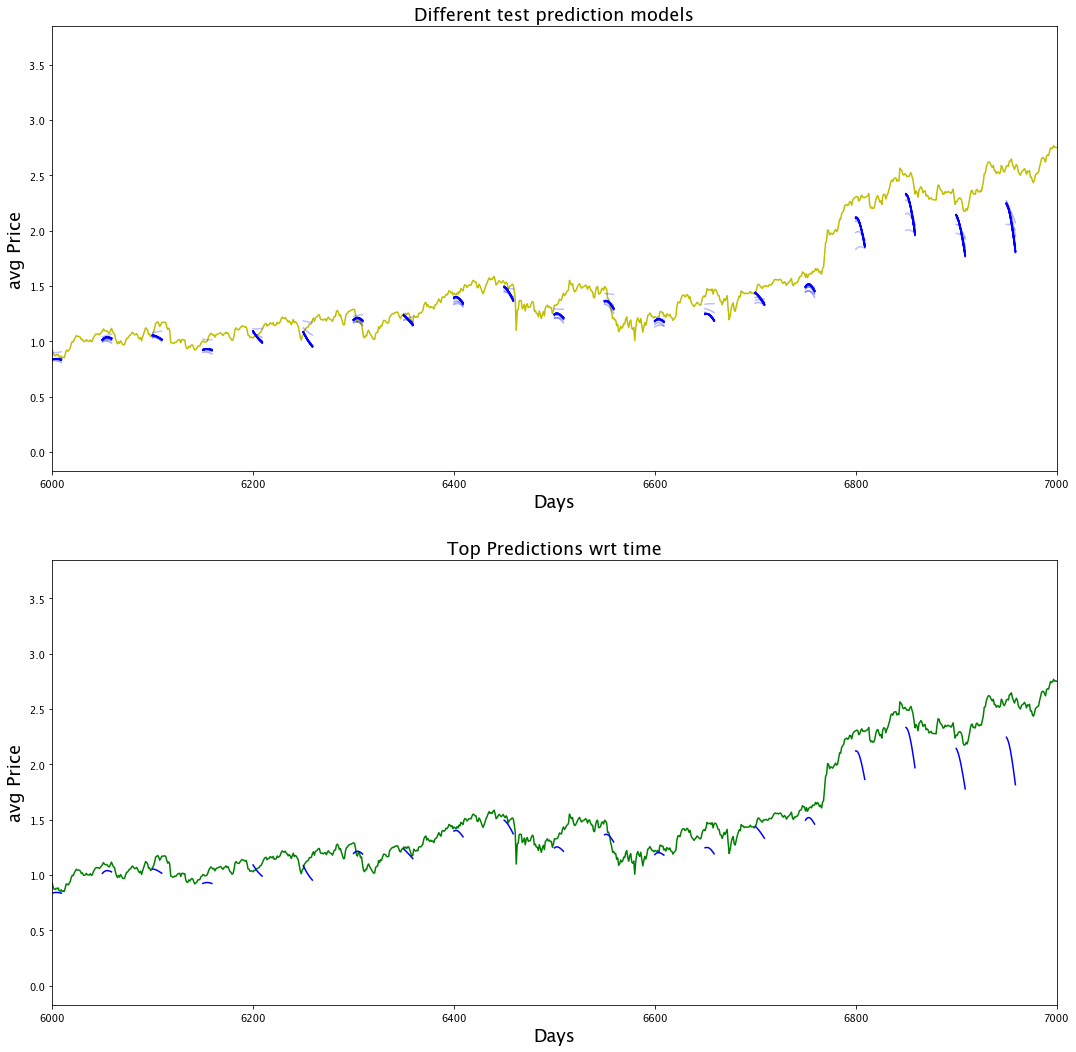

In [135]:
best_prediction_epoch = 49 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(df2.shape[0]),all_avg_data,color='y',label='data')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='b',alpha=alpha[p_i],label='stock price movement change')

plt.title('Different test prediction models',fontsize=18)
plt.xlabel('Days',fontsize=18)
plt.ylabel('avg Price',fontsize=18)
plt.xlim(6000,7000)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df2.shape[0]),all_avg_data,color='g',label='predictions')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='b',label='change in price movement')
    
plt.title('Top Predictions wrt time',fontsize=18)
plt.xlabel('Days',fontsize=18)
plt.ylabel('avg Price',fontsize=18)
plt.xlim(6000,7000)
plt.show()

## Conclusions

#####  We predict stock price movements and not stock price over time

#### The blue ticks indicate changes in the stock price movement i.e. their momentum

#### This is calculated by splitting the unroll sequence generator

#### The Y axis between 0 and 3.5 and all price movement are between them.

#### But our LSTM model is not predicting very well . It seems to capture the downward trends better than upwards ones.

#### But generally over a longer time LSTM can detect stock price movements much better than it can detect stock prices